In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


In [2]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importing necessary libraries
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model  import SGDClassifier, RidgeClassifier, LogisticRegression 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import xgboost as xg


# To ingnore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the train data
raw_train = pd.read_csv('/kaggle/input/students-drop-out-prediction/train.csv')

In [4]:
# To check if any column has null values
# To check type of every feature
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3796 non-null   int64  
 1   v_21    3796 non-null   int64  
 2   v_32    3796 non-null   int64  
 3   v_15    3796 non-null   int64  
 4   v_4     3796 non-null   int64  
 5   v_1     3796 non-null   int64  
 6   v_8     3796 non-null   int64  
 7   v_12    3796 non-null   int64  
 8   v_25    3796 non-null   int64  
 9   v_20    3796 non-null   int64  
 10  v_18    3796 non-null   int64  
 11  v_3     3796 non-null   int64  
 12  v_11    3796 non-null   int64  
 13  v_14    3796 non-null   int64  
 14  v_26    3796 non-null   int64  
 15  v_27    3796 non-null   int64  
 16  v_30    3796 non-null   int64  
 17  v_9     3796 non-null   int64  
 18  v_31    3796 non-null   int64  
 19  v_28    3796 non-null   int64  
 20  v_13    3796 non-null   int64  
 21  v_33    3796 non-null   int64  
 22  

In [5]:
# To check shape of train data
raw_train.shape

(3796, 43)

In [6]:
#chacking the number of classes and distribution of classes
raw_train["label"].value_counts() # It is Multiclass classification problem with three classes

1    1863
0    1243
2     690
Name: label, dtype: int64

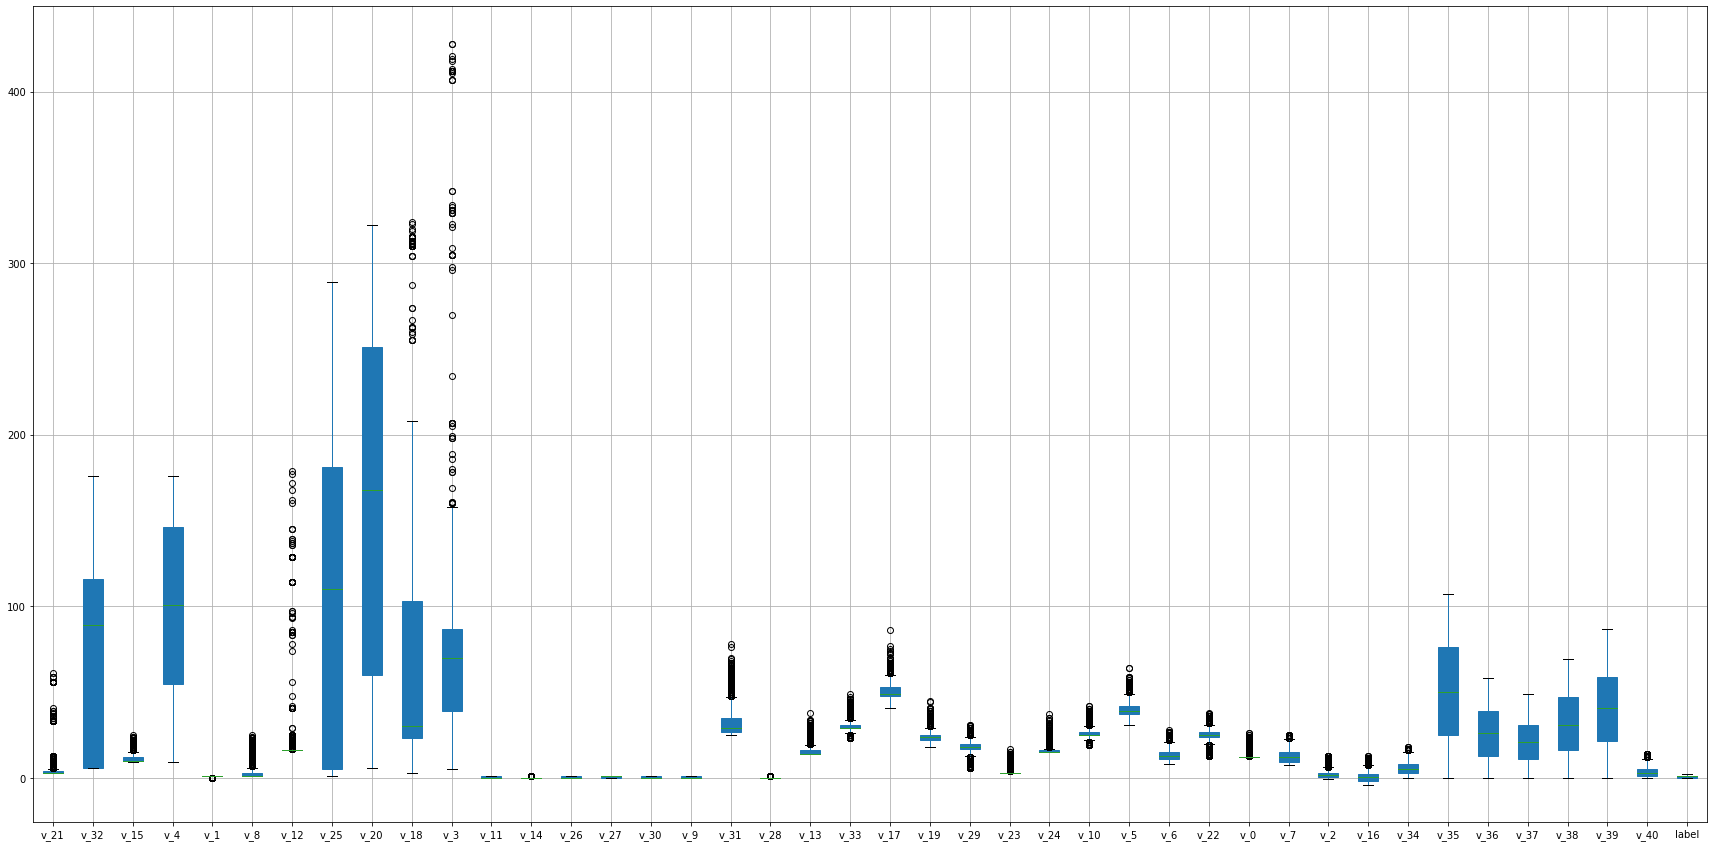

In [7]:
raw_train[raw_train.columns[1:]].boxplot(figsize=(30,15), patch_artist=True);  #checking distribution and outliers in data
plt.show()

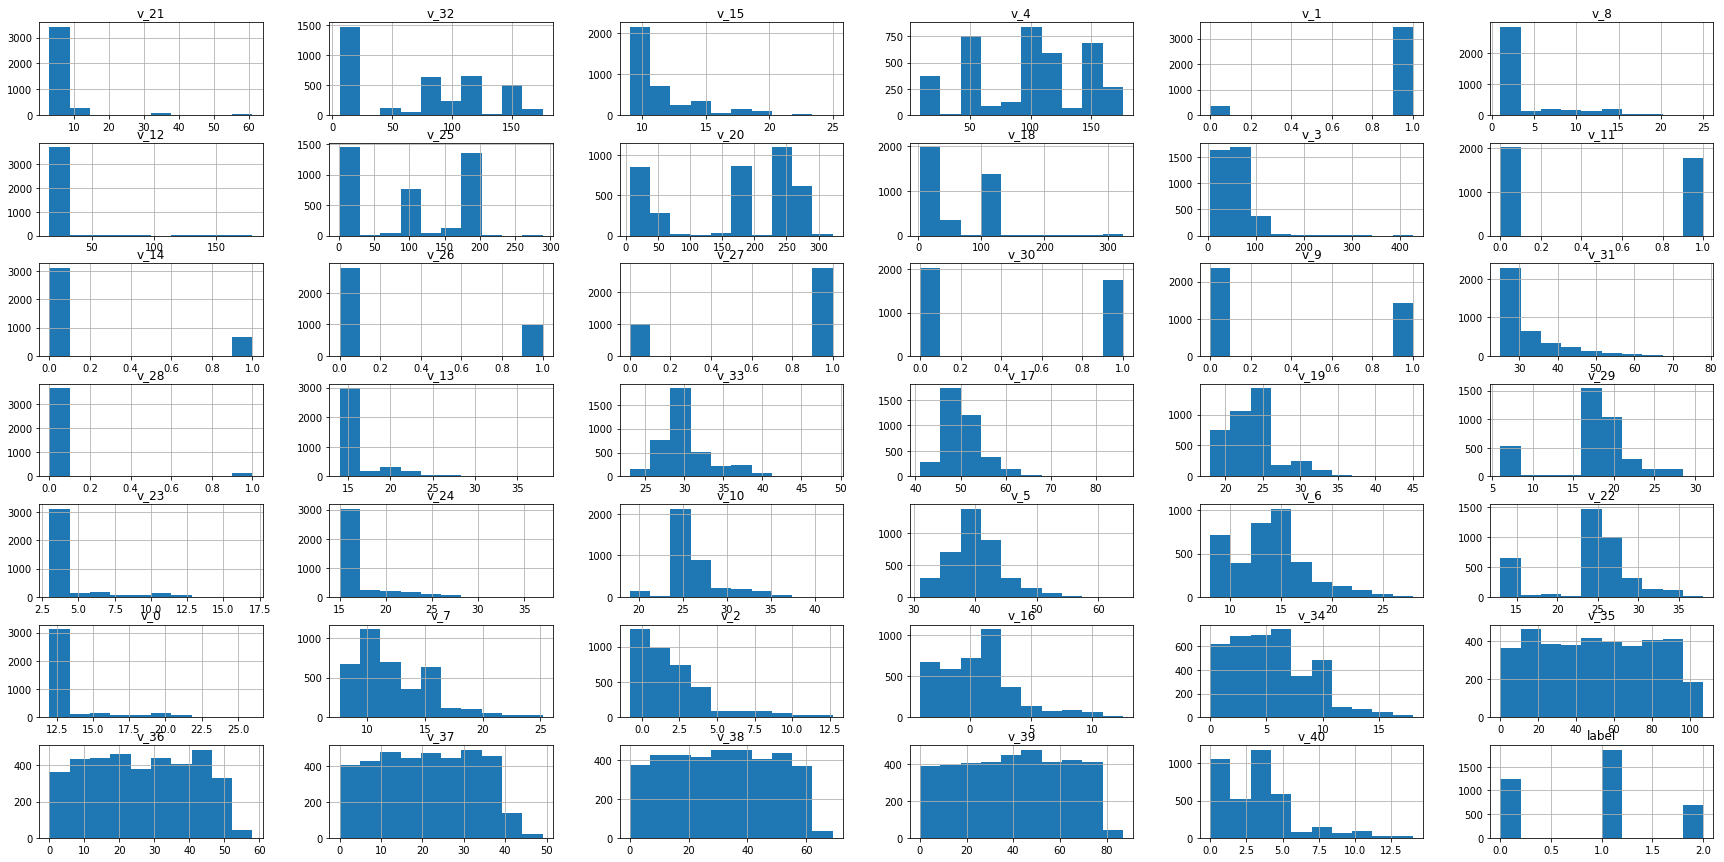

In [8]:
raw_train[raw_train.columns[1:]].hist(figsize=(30,15))
plt.show()

<AxesSubplot:>

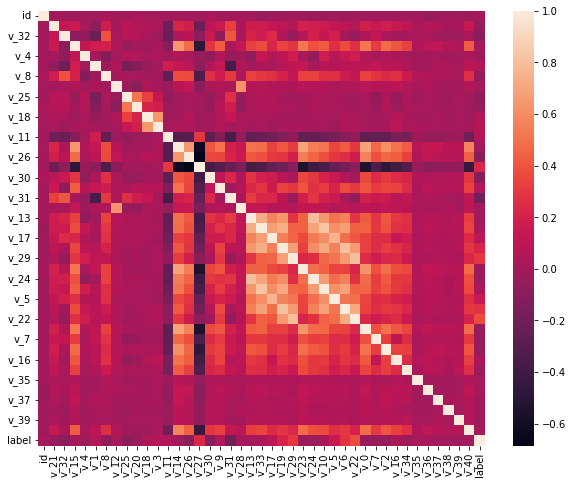

In [9]:
plt.subplots(figsize=(10,8)) # checking the correlation between variables
sns.heatmap(raw_train.corr())

In [10]:
X = raw_train.drop(columns=["id", "label"]).to_numpy()   #assigning features and labels
y = raw_train["label"].to_numpy()

In [11]:
#spiting the data into train and test set to check the performance of the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)

min_max = MinMaxScaler()                     #Use MinMaxScaler to Scale the data
X_train_mm = min_max.fit_transform(X_train)
X_test_mm = min_max.transform(X_test)

std_scl = StandardScaler()                  #Use StandardScaler to Scale the data
X_train_ss = std_scl.fit_transform(X_train)
X_test_ss = std_scl.transform(X_test)

In [12]:
# For developing a baseline
models = {"Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Gradient Boost": GradientBoostingClassifier(),
          "SGD": SGDClassifier(),
          "XG Boost": xg.XGBClassifier(),
          "Ada Boost": AdaBoostClassifier(),
          "NN Perceptron": MLPClassifier(),
        #   "Naive Bayes": MultinomialNB(),
          }

In [13]:
for model_name in models:
    model = models[model_name]
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model.fit(X_train_mm, y_train)
    y_train_pred_mm = model.predict(X_train_mm)
    y_test_pred_mm = model.predict(X_test_mm)
    
    model.fit(X_train_ss, y_train)
    y_train_pred_ss = model.predict(X_train_ss)
    y_test_pred_ss = model.predict(X_test_ss)

    print(f"{'-'*5} {model_name} {'-'*5}")
    print(f"\tTrain Performance normal vs minmax vs standardscalar")
    print(f"\t- Accuracy : {round(accuracy_score(y_train, y_train_pred), 4)}, {round(accuracy_score(y_train, y_train_pred_mm), 4)}, {round(accuracy_score(y_train, y_train_pred_ss), 4)}")
    print(f"\t- Precision : {round(precision_score(y_train, y_train_pred, average='micro'), 4)}, {round(precision_score(y_train, y_train_pred_mm, average='weighted'), 4)}, {round(precision_score(y_train, y_train_pred_ss, average='weighted'), 4)}")
    print(f"\t- Recall : {round(recall_score(y_train, y_train_pred, average='micro'), 4)}, {round(recall_score(y_train, y_train_pred_mm, average='weighted'), 4)}, {round(recall_score(y_train, y_train_pred_ss, average='weighted'), 4)}")
    print(f"\t- F1 : {round(f1_score(y_train, y_train_pred, average='micro'), 4)}, {round(f1_score(y_train, y_train_pred_mm, average='weighted'), 4)}, {round(f1_score(y_train, y_train_pred_ss, average='weighted'), 4)}")
    print(f"\tTest Performance normal vs minmax vs standardscalar")
    print(f"\t- Accuracy : {round(accuracy_score(y_test, y_test_pred), 4)}, {round(accuracy_score(y_test, y_test_pred_mm), 4)}, {round(accuracy_score(y_test, y_test_pred_ss), 4)}")
    print(f"\t- Precision : {round(precision_score(y_test, y_test_pred, average='micro'), 4)}, {round(precision_score(y_test, y_test_pred_mm, average='weighted'), 4)}, {round(precision_score(y_test, y_test_pred_ss, average='weighted'), 4)}")
    print(f"\t- Recall : {round(recall_score(y_test, y_test_pred, average='micro'), 4)}, {round(recall_score(y_test, y_test_pred_mm, average='weighted'), 4)}, {round(recall_score(y_test, y_test_pred_ss, average='weighted'), 4)}")
    print(f"\t- F1 : {round(f1_score(y_test, y_test_pred, average='micro'), 4)}, {round(f1_score(y_test, y_test_pred_mm, average='weighted'), 4)}, {round(f1_score(y_test, y_test_pred_ss, average='weighted'), 4)}", end="\n\n")

----- Logistic Regression -----
	Train Performance normal vs minmax vs standardscalar
	- Accuracy : 0.7164, 0.7434, 0.7484
	- Precision : 0.7164, 0.7263, 0.733
	- Recall : 0.7164, 0.7434, 0.7484
	- F1 : 0.7164, 0.722, 0.7314
	Test Performance normal vs minmax vs standardscalar
	- Accuracy : 0.7026, 0.725, 0.7171
	- Precision : 0.7026, 0.6919, 0.6895
	- Recall : 0.7026, 0.725, 0.7171
	- F1 : 0.7026, 0.6982, 0.6968

----- Random Forest -----
	Train Performance normal vs minmax vs standardscalar
	- Accuracy : 1.0, 1.0, 1.0
	- Precision : 1.0, 1.0, 1.0
	- Recall : 1.0, 1.0, 1.0
	- F1 : 1.0, 1.0, 1.0
	Test Performance normal vs minmax vs standardscalar
	- Accuracy : 0.7382, 0.7303, 0.7382
	- Precision : 0.7382, 0.6997, 0.7065
	- Recall : 0.7382, 0.7303, 0.7382
	- F1 : 0.7382, 0.704, 0.7074

----- Gradient Boost -----
	Train Performance normal vs minmax vs standardscalar
	- Accuracy : 0.8422, 0.8422, 0.8422
	- Precision : 0.8422, 0.8421, 0.8421
	- Recall : 0.8422, 0.8422, 0.8422
	- F1 : 0.84

In [14]:
# XGboost and gradient boost have good accuracy based on baseline
# tune the models with hyperparameters for better accuracy

lr_params = {"penalty": ["l1", "l2"], 
             "C": [0, 0.25, 0.5, 0.75, 1],
             "max_iter": [250]}
rf_params = {"criterion": ["gini", "entropy"], 
             "max_depth": [2, 5, 7, 10],'n_estimators':[50, 100, 200],
             "min_samples_split": [2, 4, 6]}
gb_params = {"n_estimators": [50,100, 200],
             "max_depth": [2, 5, 7, 10], "min_samples_split": [2, 4, 6]}
sd_params = {"l1_ratio": [i/10 for i in range(11)],
             "max_iter": [1000, 1500, 2000]}
xd_params = {"max_depth": list(range(1, 11)),
             'n_estimators':[50,80,100]}
ad_params = {"n_estimators": list(range(50, 251, 50)), 
             "learning_rate": [i/10 for i in range(11)]}
nn_params = {"hidden_layer_sizes": [(100,), (10, 2), (50, 2), (2, 50)], 
             "early_stopping": [True, False]}

models_params = [("Logistic Regression", LogisticRegression(), lr_params), 
                 ("Random Forest", RandomForestClassifier(), rf_params),
                 ("Gradient Boost", GradientBoostingClassifier(), gb_params),
                 ("SGD", SGDClassifier(), sd_params),
                 ("XG Boost", xg.XGBClassifier(), xd_params),
                 ("Ada Boost", AdaBoostClassifier(), ad_params),
                 ("NN Perceptron", MLPClassifier(), nn_params)]

In [15]:
best_model_params = {}
best_model_params_mm = {}
best_model_params_ss = {}

for model_name, model, params in models_params:
    gscv = GridSearchCV(estimator=model, 
                        param_grid=params, scoring='accuracy', n_jobs=-1, cv=3)

    gscv.fit(X_train, y_train)
    y_train_pred = gscv.predict(X_train)
    y_test_pred = gscv.predict(X_test)
    best_model_params[model_name] = gscv.best_params_
    
    gscv.fit(X_train_mm, y_train)
    y_train_pred_mm = gscv.predict(X_train_mm)
    y_test_pred_mm = gscv.predict(X_test_mm)
    best_model_params_mm[model_name] = gscv.best_params_

    gscv.fit(X_train_ss, y_train)
    y_train_pred_ss = gscv.predict(X_train_ss)
    y_test_pred_ss = gscv.predict(X_test_ss)
    best_model_params_ss[model_name] = gscv.best_params_


    print(f"{'-'*5} {model_name} {'-'*5}")
    print(f"\tTrain Performance normal vs minmax vs standardscalar")
    print(f"\t- Accuracy : {round(accuracy_score(y_train, y_train_pred), 4)}, {round(accuracy_score(y_train, y_train_pred_mm), 4)}, {round(accuracy_score(y_train, y_train_pred_ss), 4)}")
    print(f"\tTest Performance normal vs minmax vs standardscalar")
    print(f"\t- Accuracy : {round(accuracy_score(y_test, y_test_pred), 4)}, {round(accuracy_score(y_test, y_test_pred_mm), 4)}, {round(accuracy_score(y_test, y_test_pred_ss), 4)}", end="\n\n")

----- Logistic Regression -----
	Train Performance normal vs minmax vs standardscalar
	- Accuracy : 0.7283, 0.7434, 0.7484
	Test Performance normal vs minmax vs standardscalar
	- Accuracy : 0.7079, 0.725, 0.7184

----- Random Forest -----
	Train Performance normal vs minmax vs standardscalar
	- Accuracy : 0.9134, 0.9005, 0.9035
	Test Performance normal vs minmax vs standardscalar
	- Accuracy : 0.7368, 0.7342, 0.7355

----- Gradient Boost -----
	Train Performance normal vs minmax vs standardscalar
	- Accuracy : 0.8182, 0.8202, 0.8202
	Test Performance normal vs minmax vs standardscalar
	- Accuracy : 0.7487, 0.7408, 0.7421

----- SGD -----
	Train Performance normal vs minmax vs standardscalar
	- Accuracy : 0.6123, 0.726, 0.7115
	Test Performance normal vs minmax vs standardscalar
	- Accuracy : 0.5855, 0.7118, 0.7118

----- XG Boost -----
	Train Performance normal vs minmax vs standardscalar
	- Accuracy : 0.8804, 0.8804, 0.8804
	Test Performance normal vs minmax vs standardscalar
	- Accur

In [16]:
best_model_params

{'Logistic Regression': {'C': 0.25, 'max_iter': 250, 'penalty': 'l2'},
 'Random Forest': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_split': 4,
  'n_estimators': 50},
 'Gradient Boost': {'max_depth': 2,
  'min_samples_split': 6,
  'n_estimators': 200},
 'SGD': {'l1_ratio': 0.4, 'max_iter': 1000},
 'XG Boost': {'max_depth': 3, 'n_estimators': 80},
 'Ada Boost': {'learning_rate': 0.4, 'n_estimators': 200},
 'NN Perceptron': {'early_stopping': True, 'hidden_layer_sizes': (100,)}}

In [17]:
best_model_params_ss

{'Logistic Regression': {'C': 0.25, 'max_iter': 250, 'penalty': 'l2'},
 'Random Forest': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_split': 6,
  'n_estimators': 200},
 'Gradient Boost': {'max_depth': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 'SGD': {'l1_ratio': 0.5, 'max_iter': 1500},
 'XG Boost': {'max_depth': 3, 'n_estimators': 80},
 'Ada Boost': {'learning_rate': 0.4, 'n_estimators': 200},
 'NN Perceptron': {'early_stopping': True, 'hidden_layer_sizes': (100,)}}

In [18]:
best_model_params_mm

{'Logistic Regression': {'C': 1, 'max_iter': 250, 'penalty': 'l2'},
 'Random Forest': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_split': 6,
  'n_estimators': 50},
 'Gradient Boost': {'max_depth': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 'SGD': {'l1_ratio': 0.8, 'max_iter': 2000},
 'XG Boost': {'max_depth': 3, 'n_estimators': 80},
 'Ada Boost': {'learning_rate': 0.4, 'n_estimators': 200},
 'NN Perceptron': {'early_stopping': False, 'hidden_layer_sizes': (100,)}}

In [19]:
xgb = xg.XGBClassifier(max_depth= 3, n_estimators = 80)
xgb.fit(X_train, y_train)
print('training score: ',xgb.score(X_train, y_train))
print('testing Score: ', xgb.score(X_test, y_test))

training score:  0.8804347826086957
testing Score:  0.7539473684210526


In [20]:
test_data = pd.read_csv('/kaggle/input/students-drop-out-prediction/test.csv')
test_X = test_data.drop(columns = ['id'])
test_X

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,9,90,15,121,1,8,23,114,256,108,...,10.8,10.4,6.74,4,96,36,34,23,72,5
1,7,123,14,126,1,5,19,3,40,261,...,19.4,0.5,6.79,15,78,12,25,27,67,12
2,3,6,10,102,1,1,16,181,168,103,...,7.6,2.6,0.32,4,81,47,30,54,23,4
3,3,6,10,148,1,1,16,110,278,103,...,11.1,0.6,2.02,4,100,6,23,12,28,1
4,3,6,10,148,1,1,16,1,168,12,...,7.6,2.6,0.32,7,97,25,30,18,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,4,147,10,167,0,1,16,181,251,103,...,9.4,-0.8,-3.12,4,6,46,1,13,21,5
1624,3,6,14,121,1,1,16,183,278,103,...,10.8,1.4,1.74,1,96,28,15,59,65,0
1625,3,116,10,167,0,1,16,181,251,103,...,12.7,3.7,-1.70,9,98,27,33,42,33,0
1626,3,6,10,76,1,1,16,5,60,11,...,11.1,0.6,2.02,5,42,45,16,55,6,2


In [21]:
xgb = xg.XGBClassifier(max_depth= 3, n_estimators = 80, random_state = 1729)

xgb_pipe = make_pipeline(StandardScaler(), xgb).fit(X,y)
print(xgb_pipe.score(X,y))
prediction = xgb_pipe.predict(test_X)

0.8627502634351949


In [22]:
prediction = pd.DataFrame({'id':test_data.id, 'label': prediction })   # kaggle submission
prediction.to_csv('final_submission.csv', index = False)